### Challenge: Implement the Nearest Neighbor algorithm

Lets use the music dataset to develope Nearest Neighbor algorism using python 3.

In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [18]:
music.head()

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


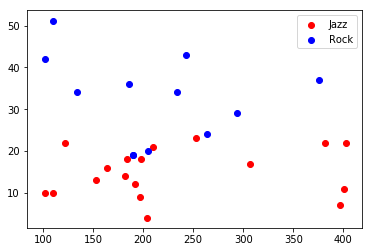

In [26]:
plt.scatter(music[music['jazz'] == 1].duration, music[music['jazz'] == 1].loudness,  c = 'red');
plt.scatter(music[music['jazz'] == 0].duration, music[music['jazz'] == 0].loudness,  c = 'b');
plt.legend(['Jazz', 'Rock']);

We will use euclidean distance to measure the similiarity of points.

In [45]:
trainset = np.array(music[['duration', 'loudness', 'jazz']])
train = np.array(music[['duration', 'loudness']])
def euclid_distance(ele1, ele2):
    dist = 0
    for i in range(2):
        dist += (ele1[i] - ele2[i])**2
    return math.sqrt(dist) 
import operator
def knearest_neighbor(trainset, test_ele, k):
    distance = []
    for i in range(len(trainset)):
        eucl_dist = euclid_distance(train[i], test_ele)
        distance.append((trainset[i], eucl_dist))
    distance.sort(key = operator.itemgetter(1)) 
    neighbors = []
    for j in range(k):
        neighbors.append(distance[j])
    return neighbors

In [49]:
print(knearest_neighbor(trainset, [220, 35], 5))
neighbors = knearest_neighbor(trainset, [220, 35], 5)

[(array([234,  34,   0]), 14.035668847618199), (array([210,  21,   1]), 17.204650534085253), (array([205,  20,   0]), 21.213203435596427), (array([243,  43,   0]), 24.351591323771842), (array([198,  18,   1]), 27.80287754891569)]


lets see the vote now

In [58]:
no_jazz = 0
for n in range(len(neighbors)):
    no_jazz += neighbors[n][0][2]
print('performnace of the algorism based on the single test set was: {}'.format(no_jazz/5))   

performnace of the algorism based on the single test set was: 0.4
